# Практика

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

# Выбрал e^-x, для x>0

In [6]:
expon_rv = sts.expon()
sample = expon_rv.rvs(100000)
sample

array([1.78265903, 0.31806764, 0.6562912 , ..., 0.11485798, 1.01804089,
       0.28646194])

# Гистограмма выборки и плотности

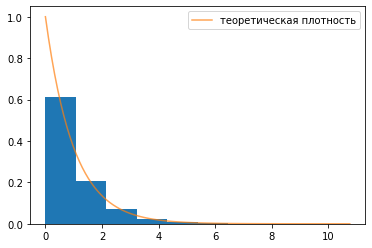

In [7]:
plt.hist(sample, density=True)
x = np.linspace(0, sample.max(), 100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.7)
plt.legend()

In [8]:
# Среднее и дисперсия
print("Среднее значение {}".format(sample.mean()))
print("Дисперсия по выборке {}".format(sample.var()))

Среднее значение 0.9983358230215176
Дисперсия по выборке 0.9969474202198852


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.
Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

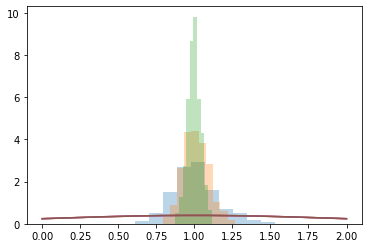

In [70]:
real_mean, real_var = sts.expon.stats(moments="mv")
REPEATS = 500
sizes = (50, 150, 500)
means_storage = []
for size in sizes:
    means_in_size = [expon_rv.rvs(size).mean() for _ in range(REPEATS)]
    means_storage.append(means_in_size)
    plt.hist(means_in_size, density=True, alpha=0.3)
    
abscissa = np.linspace(0, 2, 500)

for idx, size in enumerate(sizes):
    ordinate = sts.norm(real_mean, real_var).pdf(abscissa)
#     pdfs.append(ordinate)
    plt.plot(abscissa, ordinate)

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**
Не уверен, что правильно сделал, ибо у exp среднее равно = 1. А у меня это явно не так

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [79]:
URL = 'https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
df = pd.read_csv(URL)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [134]:
left = df[df["churn"] == True]
stayed = df[df["churn"] == False]
left_average_calls = left["total day calls"].mean()
stayed_average_calls = stayed["total day calls"].mean()
left_var = left["total day calls"].var()
stayed_var = stayed["total day calls"].var()

# Ушли в диапозоне
print(left_average_calls - np.sqrt(left_var), left_average_calls + np.sqrt(left_var))
# Остались в диапозоне
print(stayed_average_calls - np.sqrt(stayed_var), stayed_average_calls + np.sqrt(stayed_var))

from statsmodels.stats.weightstats import _zconfint_generic
left_var_ddof = left["total day calls"].var(ddof=1)
stayed_var_ddof = stayed["total day calls"].var(ddof=1)

# Ушли
print(_zconfint_generic(left_average_calls, np.sqrt(left_var_ddof), 0.5, "two-sided"))
# Остались
print(_zconfint_generic(stayed_average_calls, np.sqrt(stayed_var_ddof), 0.5, "two-sided"))

79.75309651363257 122.91771093978359
80.48200094293134 120.08431484654236
(86.77835872590569, 115.89244872751047)
(86.92748048872015, 113.63883530075354)
